In [188]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast
from cleaning import *

In [102]:
# use this to keep the cells wider, very nice on wide screens, set the percentage as you like it
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [189]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
from pandas.io.common import _NA_VALUES
na_values = _NA_VALUES - {'NULL', 'null', 'nan', 'NaN'}

animes = pd.read_csv('anime_filtered.csv')
users = pd.read_csv('users_filtered.csv', na_values=na_values, keep_default_na=False)

In [105]:
plt.rcParams.update(mpl.rcParamsDefault)  # for recovering from xkcd

# taken from https://github.com/ctokheim/matplotlibrc
#plt.style.use('seaborn')
plt.style.use('seaborn-talk')
#plt.style.use('ggplot')
#plt.xkcd()

conf = {
    'font.size': 14.0,
    'axes.grid': True,
    'axes.axisbelow': True,
    'axes.edgecolor': 'black',
#    'axes.facecolor': '#E5E5EF',
#    'axes.facecolor': '#E0E0EF',
    'axes.labelcolor': 'black',
    'axes.titlesize': 15.6,
    'axes.labelsize': 'large',    
    'figure.figsize': (12, 7),
    'figure.titlesize': 'x-large',
    'grid.linewidth': 1.3,
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'legend.fontsize': 'large',
}

plt.rcParams.update(conf)


In [106]:
plt.rcParams

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.for

In [107]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [108]:
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes
count,1.161330e+05,116133.000000,116133.000000,116133.000000,116133.000000,116133.000000,1.161330e+05,0.0,116133.000000,116133.000000,1.161330e+05
mean,1.810832e+06,14.610283,195.498807,11.338018,11.818518,74.936332,9.329691e+01,NaN,7.713389,13.991079,6.611762e+03
std,1.996139e+06,32.459424,256.533148,31.622640,31.117077,177.889249,7.636053e+03,NaN,1.538595,54.731186,7.155270e+05
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00
25%,1.990980e+05,3.000000,47.000000,0.000000,0.000000,5.000000,2.246000e+01,NaN,7.310000,0.000000,1.349000e+03
50%,5.615770e+05,7.000000,121.000000,4.000000,3.000000,27.000000,4.990000e+01,NaN,7.880000,1.000000,3.017000e+03
75%,3.464591e+06,16.000000,253.000000,12.000000,12.000000,80.000000,9.277000e+01,NaN,8.460000,10.000000,5.642000e+03
max,7.251737e+06,2934.000000,11536.000000,2562.000000,2457.000000,12051.000000,2.601351e+06,NaN,10.000000,9404.000000,2.437949e+08


In [109]:
# dropping users with invalid and obviously incorrect dates
users['birth_date'] = pd.to_datetime(users['birth_date'], errors='coerce')
users['last_online'] = pd.to_datetime(users['last_online'], errors='coerce')
users['join_date'] = pd.to_datetime(users['join_date'], errors='coerce')
users = users.dropna(subset=['birth_date', 'last_online', 'join_date'])
#users = users[users['last_online'].dt.year > 1950]

In [110]:
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes
count,1.161310e+05,116131.000000,116131.00000,116131.000000,116131.000000,116131.000000,1.161310e+05,0.0,116131.000000,116131.000000,1.161310e+05
mean,1.810839e+06,14.610259,195.49259,11.338084,11.818429,74.935771,9.329698e+01,NaN,7.713378,13.991286,6.611773e+03
std,1.996147e+06,32.459676,256.52762,31.622901,31.117304,177.890713,7.636119e+03,NaN,1.538603,54.731634,7.155332e+05
min,1.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00
25%,1.991000e+05,3.000000,47.00000,0.000000,0.000000,5.000000,2.246000e+01,NaN,7.310000,0.000000,1.349000e+03
50%,5.615770e+05,7.000000,121.00000,4.000000,3.000000,27.000000,4.990000e+01,NaN,7.880000,1.000000,3.017000e+03
75%,3.464671e+06,16.000000,253.00000,12.000000,12.000000,80.000000,9.277000e+01,NaN,8.460000,10.000000,5.642000e+03
max,7.251737e+06,2934.000000,11536.00000,2562.000000,2457.000000,12051.000000,2.601351e+06,NaN,10.000000,9404.000000,2.437949e+08


In [111]:
users.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0


In [112]:
users['gender'].value_counts().plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:848: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


In [113]:
users['gender'].value_counts().plot.pie()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2913: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  1.25 + center[1]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:848: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


In [114]:
users.dtypes

username                            object
user_id                              int64
user_watching                        int64
user_completed                       int64
user_onhold                          int64
user_dropped                         int64
user_plantowatch                     int64
user_days_spent_watching           float64
gender                              object
location                            object
birth_date                  datetime64[ns]
access_rank                        float64
join_date                   datetime64[ns]
last_online                 datetime64[ns]
stats_mean_score                   float64
stats_rewatched                    float64
stats_episodes                     float64
dtype: object

In [115]:
users['birth_date'].dt.year.hist(bins=50, figsize=(16, 8))

In [116]:
users['last_online'].dt.year.hist(bins=50, figsize=(16, 8))

In [117]:
users['birth_date'].value_counts()

1993-01-01    365
1991-01-01    362
1990-01-01    352
1992-01-01    352
1994-01-01    335
1995-01-01    307
1989-01-01    307
1996-01-01    242
1988-01-01    209
1997-01-01    204
1987-01-01    173
1998-01-01    133
1986-01-01    130
1985-01-01    107
1999-01-01     98
1930-01-01     81
1983-01-01     79
1984-01-01     78
1993-09-01     53
1994-09-01     51
1994-03-01     48
1996-10-10     47
1994-06-01     47
1991-11-01     47
1995-09-01     46
1993-05-05     45
1993-03-01     45
1995-11-01     44
1994-05-20     43
1993-09-10     43
             ... 
1977-12-05      1
1980-03-18      1
1977-06-26      1
1972-10-09      1
2013-11-15      1
2013-10-18      1
1980-11-15      1
1980-04-13      1
1973-06-07      1
1930-01-18      1
1971-03-22      1
1978-01-26      1
1981-12-24      1
1979-09-12      1
1963-09-18      1
1961-06-06      1
1982-01-18      1
1982-06-12      1
1983-09-29      1
2013-06-05      1
2017-12-29      1
1974-01-08      1
1976-04-21      1
1932-05-02      1
1930-01-19

In [118]:
users[users['birth_date'] == '1944-11-19']

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
27130,LulyPie,231964,88,219,1,7,181,138.56,Female,SinSendGoodMe,1944-11-19,NaN,2009-09-09,1900-01-13 01:01:00,7.54,23.0,8319.0


In [119]:
users['last_online'].value_counts()

1900-05-13 14:11:00    7
1900-05-13 16:19:00    7
2013-09-13 08:34:00    6
1900-05-11 11:43:00    6
2018-05-15 12:58:00    6
2013-09-13 08:29:00    6
2018-05-14 12:44:00    6
1900-05-12 10:21:00    5
1900-05-12 13:21:00    5
1900-05-13 12:04:00    5
1900-01-18 13:37:00    5
2013-09-13 13:00:00    5
1900-05-09 15:48:00    5
1900-05-14 12:06:00    5
1900-05-14 08:57:00    5
1900-05-12 20:22:00    5
1900-05-14 08:24:00    5
1900-05-11 12:52:00    5
1900-05-13 09:19:00    5
1900-05-13 17:14:00    5
1900-05-13 14:01:00    5
1900-05-13 13:55:00    5
2013-09-13 08:16:00    5
1900-05-11 16:30:00    5
1900-05-16 19:55:00    5
1900-05-12 17:29:00    5
1900-05-12 12:10:00    5
1900-05-13 12:55:00    5
2018-05-16 12:58:00    5
1900-05-13 13:31:00    5
                      ..
2013-10-26 16:28:00    1
1900-02-28 10:36:00    1
1900-01-20 23:01:00    1
1900-03-27 17:26:00    1
2016-04-20 17:02:00    1
2017-01-14 18:32:00    1
2016-11-02 21:23:00    1
2009-11-17 23:43:00    1
2015-08-11 07:31:00    1


In [120]:
users[users['last_online'].dt.year == 1900].head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
5,Bas_G,5015094,35,114,6,20,175,30.81,Male,"Nijmegen, Nederland",1999-10-24,NaN,2015-11-26,1900-05-10 13:53:00,7.86,0.0,1847.0
6,HimeAria,3129315,2,87,2,0,28,20.12,Female,Poland,1996-09-26,NaN,2013-09-08,1900-04-27 10:52:00,8.23,0.0,1314.0
8,Slimak,61677,79,224,0,3,84,126.17,Male,Poland,1988-02-21,NaN,2008-05-18,1900-05-01 05:04:00,7.77,2.0,7472.0


In [121]:
users['join_date'].dt.year.hist(bins=14, figsize=(16, 8))

In [122]:
(2018 - users['birth_date'].dt.year).plot(kind='hist', bins=80, figsize=(16, 8), title='age')
plt.gca().grid('on')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:848: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


In [123]:
#now really inferring the best estimation of last online
users_last_list_update = get_users_last_list_update_cached()
users_last_list_update['last_list_update'] = pd.to_datetime(users_last_list_update['last_list_update'])
users_merged = pd.merge(users[['username', 'last_online']], users_last_list_update, left_on='username', right_index=True)
users.loc[users['last_online'].dt.year == 1900, 'last_online'] = users_merged[users['last_online'].dt.year == 1900]['last_list_update']

KeyError: 'last_list_update'

In [ ]:
users[users['username'].isin(['RedvelvetDaisuki', 'Damonashu', 'Bas_G'])][['username', 'last_online']].head()

In [ ]:
users['last_online'].dt.year.hist(bins=11, figsize=(16, 8))

In [ ]:
animes.head()

In [ ]:
animes['episodes'].value_counts()

In [ ]:
# banning users with 65535 episodes of single anime in their list -> not trustworthy
users_for_ban = get_users_for_episode_count_ban_cached()
print(users_for_ban)
print('num of users for ban:', len(users_for_ban))

In [ ]:
users = users[~users['username'].isin(users_for_ban)]

In [ ]:
animes.columns

In [124]:
animes[['anime_id', 'title', 'episodes', 'duration']].head()

,anime_id,title,episodes,duration
0,11013,Inu x Boku SS,12,24 min. per ep.
1,2104,Seto no Hanayome,26,24 min. per ep.
2,5262,Shugo Chara!! Doki,51,24 min. per ep.
3,721,Princess Tutu,38,16 min. per ep.
4,12365,Bakuman. 3rd Season,25,24 min. per ep.


In [125]:
#animes['duration'].value_counts()

In [126]:
# calculating watch time in minutes and adding it to new column for anime
def str_to_minutes(string):
    m = re.search('((\d+) hr\.)?( ?(\d+) min\.)?( ?(\d+) sec\.)?( per ep\.)?', string)
    hours = 0 if m.group(2) is None else int(m.group(2))
    minutes = 0 if m.group(4) is None else int(m.group(4))
    seconds = 0 if m.group(6) is None else int(m.group(6))
    return hours * 60 + minutes + seconds / 60

animes['duration_min'] = animes['duration'].apply(str_to_minutes)

In [127]:
animes[['anime_id', 'title', 'episodes', 'duration', 'duration_min']].head()

,anime_id,title,episodes,duration,duration_min
0,11013,Inu x Boku SS,12,24 min. per ep.,24.0
1,2104,Seto no Hanayome,26,24 min. per ep.,24.0
2,5262,Shugo Chara!! Doki,51,24 min. per ep.,24.0
3,721,Princess Tutu,38,16 min. per ep.,16.0
4,12365,Bakuman. 3rd Season,25,24 min. per ep.,24.0


In [128]:
users[users['username'] == 'heeroYuy']

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
7528,heeroYuy,20638,18,69,3,4,32,38.51,Male,"Philippines, digos city",1990-12-29,NaN,2007-11-07,2008-02-16 03:46:00,9.51,0.0,2297.0


In [129]:
users[users['username'] == 'abystoma2']

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
20197,abystoma2,3336425,180,5121,296,0,969,629.24,Male,Czech Republic,1997-06-02,NaN,2013-11-14,2018-05-18 01:22:00,4.74,147.0,44151.0


In [130]:
# one weird user with 2601351.02 days watches ruins the plot, ommiting him by xlim
users['user_days_spent_watching'].hist(bins=5000, figsize=(16, 8))
plt.gca().set_yscale('log')


In [131]:
users['user_days_spent_watching'].max()

2601351.02

In [184]:
users[users['user_days_spent_watching'] == 2601351.02]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes


In [133]:
# now finally fixing days watch times
user_days_spent_watching = get_user_days_spent_watching_cached()
#users['user_days_spent_watching'] = user_days_spent_watching
users_merged = pd.merge(users[['username']], user_days_spent_watching, left_on='username', right_index=True)
users['user_days_spent_watching'] = users_merged['days_spent_watching']

In [134]:
users['user_days_spent_watching'].hist(bins=1000, figsize=(16, 8))
plt.gca().set_yscale('log')


In [135]:
users.columns

Index(['username', 'user_id', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'location', 'birth_date', 'access_rank', 'join_date',
       'last_online', 'stats_mean_score', 'stats_rewatched', 'stats_episodes'],
      dtype='object')

In [136]:
# so we need also to check number of watched episodes and fix them
users['stats_episodes'].hist(bins=5000, figsize=(16, 8))
plt.gca().set_yscale('log')


In [137]:
# actually fixing number of episodes
user_episodes_cached = get_users_stats_episodes_cached()
#users['user_days_spent_watching'] = user_days_spent_watching
users_merged = pd.merge(users[['username']], user_episodes_cached, left_on='username', right_index=True)
users['stats_episodes'] = users_merged['stats_episodes']

In [138]:
users['stats_episodes'].hist(bins=500, figsize=(16, 8))
plt.gca().set_yscale('log')


In [139]:
users.loc[users['stats_episodes'].nlargest(10).index][['username', 'stats_episodes']]

,username,stats_episodes
47808,ComfyLoli,120652.0
101868,Tsutaee,118093.0
41507,TsukasaKei,100333.0
30447,spacecowboy,93622.0
20966,Dedzapadlo,82260.0
74907,De_Baer,76422.0
62254,VincentHarkonnen,74422.0
74013,xbhrjd,74347.0
8728,dumnorix98,62347.0
17366,Loomir,61370.0


In [140]:
users[users['stats_episodes'] == 133457]

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes


## Now I have some basic filtering done and data is fixed, inspecting birth date and age

In [141]:
users['age'] = 2018 - users['birth_date'].dt.year

In [142]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users age')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:848: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


In [143]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='users age', logy=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:848: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


In [144]:
users['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10), title='day of year')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:848: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2575: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:4371: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:4371: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:848: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


ValueError: Image size of 1370x110867 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x1000 with 1 Axes>

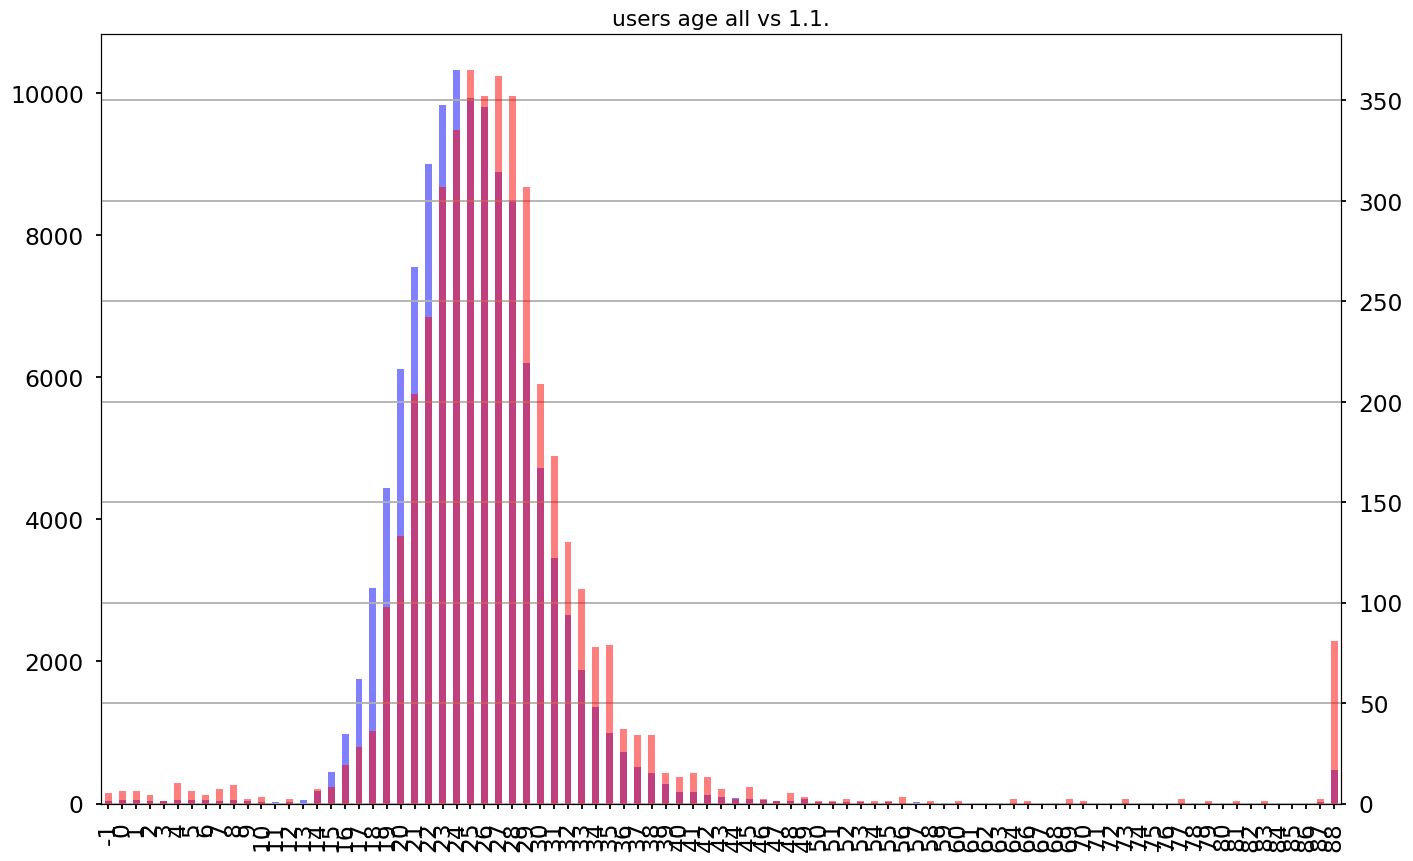

In [145]:
# this shows how people born in 1.1. are biased and thus can not be trusted
total_count = users['age'].count()
first_jan_count = users[users['birth_date'].dt.dayofyear == 1]['age'].count()
plt.figure(figsize=(16, 10))
ax = plt.gca()

users_in_first_jan = users[users['birth_date'].dt.dayofyear == 1]['age'].value_counts()
users_in_first_jan = users_in_first_jan.reindex(users['age'].value_counts().index)
users['age'].value_counts().sort_index().plot.bar(ax=ax, title='users age all vs 1.1.', color='blue', alpha=0.5)
users_in_first_jan.sort_index().plot.bar(ax=ax, color='red', alpha=0.5, secondary_y=True)
#ax.set_xlim(users['age'].min(), users['age'].max())
#plt.xticks(users['age'].value_counts().index)
plt.show()

In [146]:
import zodiac_sign
import matplotlib.dates as mdates

In [147]:
users['zodiac_sign'] = users['birth_date'].apply(zodiac_sign.get_zodiac_sign)

In [148]:
users['zodiac_sign'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='Zodiac sign')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

In [149]:
# česky:
en_cz_zodiac = {
    'Aries': 'Beran',
    'Taurus': 'Býk',
    'Gemini': 'Blíženci',
    'Cancer': 'Rak',
    'Leo': 'Lev',
    'Virgo': 'Panna',
    'Libra': 'Váhy',
    'Scorpio': 'Štír',
    'Sagittarius': 'Střelec',
    'Capricorn': 'Kozoroh',
    'Aquarius': 'Vodnář',
    'Pisces': 'Ryby',
}

time_ordered_zodiac = ['Kozoroh', 'Vodnář', 'Ryby', 'Beran', 'Býk', 'Blíženci', 'Rak', 'Lev', 'Panna', 'Váhy', 'Štír', 'Střelec']
users['zodiac_sign'].apply(lambda x: en_cz_zodiac[x]).value_counts().reindex(time_ordered_zodiac).plot.bar(figsize=(16, 10), title='Znamení zvěrokruhu')
plt.xticks(rotation=0)
plt.savefig('graphs/znameni-zverokruhu-2.png', bbox_inches="tight")
# todo: seřadit zvěrokruh podle data, ne podle abecedy
# todo 2: dodat ke všem grafům grid

In [150]:
users['zodiac_sign'].value_counts().sort_index().plot.pie(figsize=(16, 10), title='Zodiac sign') 

In [151]:
capricorn_idx = [(index, name) for index, name in zodiac_sign.en_dict if name == 'Capricorn'][0][0]
capri_r = zodiac_sign.sign_dates[capricorn_idx]
capri_r

((22, 12), (19, 1))

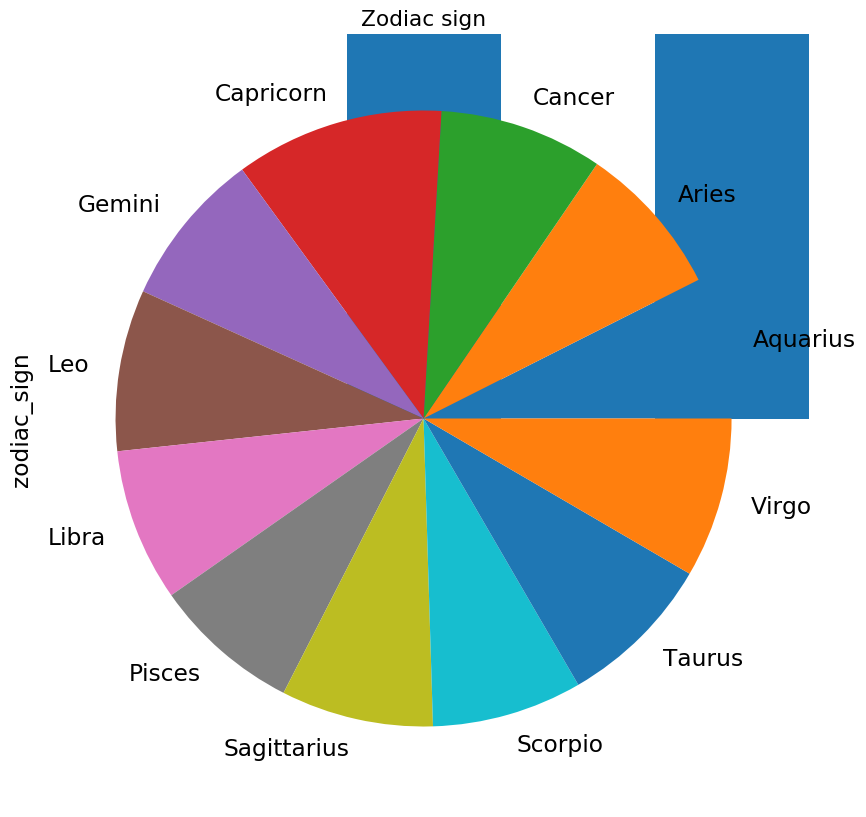

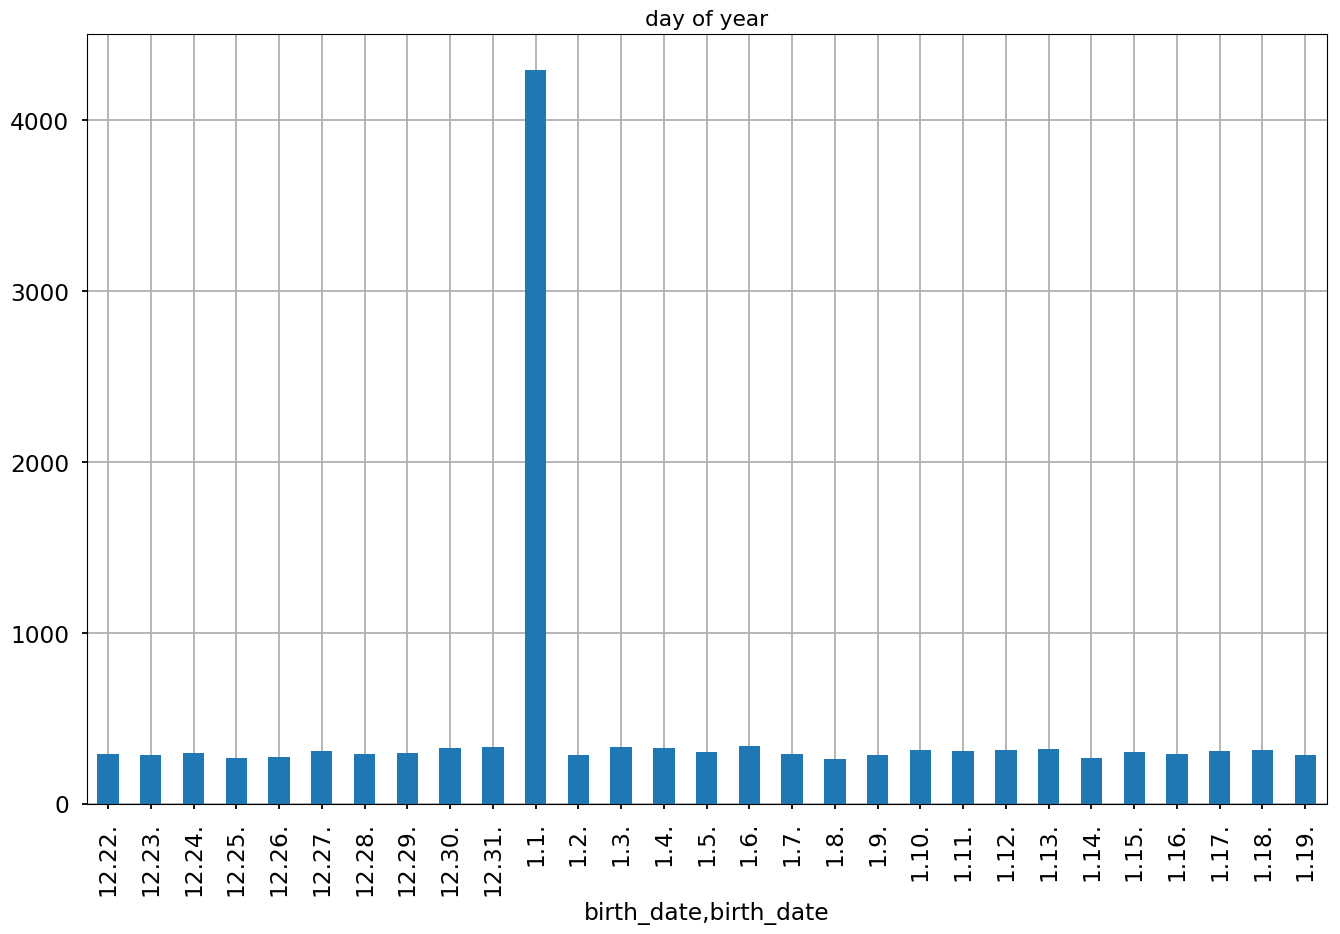

In [152]:
capri_range_condition = ((users['birth_date'].dt.day >= capri_r[0][0]) & (users['birth_date'].dt.month >= capri_r[0][1])) | ((users['birth_date'].dt.day <=capri_r[1][0]) & (users['birth_date'].dt.month <=capri_r[1][1]))
plt.figure(figsize=(16, 10))
#capri_days = users[capri_range_condition]['birth_date'].dt.dayofyear.value_counts()
capri_days = users[capri_range_condition].groupby([(users['birth_date'].dt.month),(users['birth_date'].dt.day)]).agg('count') ['birth_date']
capri_days_2 = capri_days.rename(index={12: 0}, level=0).sort_index()
capri_days_2.plot.bar(ax=plt.gca(), title='day of year')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: '{}.{}.'.format(capri_days_2.index[x][0] if capri_days_2.index[x][0] == 1 else 12, capri_days_2.index[x][1])))
plt.show()

In [153]:
plt.figure(figsize=(16, 10))
capri_days_2.plot.bar(ax=plt.gca(), title='Kozoroh-den v roce')
plt.gca().get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: '{}.{}.'.format(capri_days_2.index[x][0] if capri_days_2.index[x][0] == 1 else 12, capri_days_2.index[x][1])))
plt.xlabel('datum narození')
plt.savefig('graphs/zverokruh-dny', bbox_inches="tight")

In [154]:
# nyní bez 1.1.
users[users['birth_date'].dt.dayofyear != 1]['zodiac_sign'].apply(lambda x: en_cz_zodiac[x]).value_counts().sort_index().plot.bar(figsize=(16, 10), title='Znamení zvěrokruhu')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

## now I'll be filtering out all people with too litle watch time

In [155]:
print('users with less than hour watching: ', (users['user_days_spent_watching'] <= 1/2).sum())  # 4 hours

users with less than hour watching:  2105


In [156]:
users['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10), title='day of year', color='blue', alpha=0.5)
users[users['user_days_spent_watching'] > 1/6]['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10), color='red', alpha=0.5)


In [157]:
users[users['user_days_spent_watching'] <= 1/2]['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10))

In [158]:
users_too_few_watch = users[users['user_days_spent_watching'] <= 1/2]['age'].value_counts()
users_too_few_watch = users_too_few_watch.reindex(users['age'].value_counts().index)
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10), color='blue', alpha=0.5)
users_too_few_watch.sort_index().plot.bar(figsize=(16, 10), color='red', alpha=0.5, secondary_y=True)

In [159]:
users['user_days_spent_watching'].hist(bins=1000, figsize=(16, 8))
plt.gca().set_yscale('log')

In [160]:
users['stats_episodes'].hist(bins=500, figsize=(16, 8))
plt.gca().set_yscale('log')

In [161]:
# filtering
users = users[users['user_days_spent_watching'] > 1/2]

In [162]:
users['user_days_spent_watching'].hist(bins=1000, figsize=(16, 8))
plt.gca().set_yscale('log')

In [163]:
users['stats_episodes'].hist(bins=500, figsize=(16, 8))
plt.gca().set_yscale('log')

## filtering by age

In [164]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10))

In [165]:
users = users[(users['age'] > 9) & (users['age'] < 50)]

In [166]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10))

In [167]:
users['user_days_spent_watching'].hist(bins=1000, figsize=(16, 8))
plt.gca().set_yscale('log')

In [168]:
users['stats_episodes'].hist(bins=500, figsize=(16, 8))
plt.gca().set_yscale('log')

In [169]:
users['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10), title='day of year')

In [170]:
# filtering users born in 1.1., too many false people here
users = users[users['birth_date'].dt.dayofyear != 1]

In [171]:
users['birth_date'].dt.dayofyear.value_counts().sort_index().plot.bar(figsize=(16, 10), title='day of year')

In [172]:
users['age'].value_counts().sort_index().plot.bar(figsize=(16, 10))

In [173]:
users['user_days_spent_watching'].hist(bins=1000, figsize=(16, 8))
plt.gca().set_yscale('log')

In [174]:
users['stats_episodes'].hist(bins=500, figsize=(16, 8))
plt.gca().set_yscale('log')

In [175]:
users.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,age,zodiac_sign
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0,28,Taurus
2,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4903.0,27,Leo
3,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,9701.0,28,Sagittarius
4,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,697.0,20,Virgo
5,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24,NaN,2015-11-26,1900-05-10 13:53:00,7.86,0.0,1847.0,19,Scorpio


In [176]:
users = users.drop(['zodiac_sign'], axis=1)
users = users.drop(['age'], axis=1)  # everyone can easily calculate this column, so there is no need to keep it

In [177]:
# showing scatterplot before and after dropping few users with very large animelists
sns.pairplot(users[['user_days_spent_watching',
       'gender', 'birth_date', 'join_date',
       'last_online', 'stats_episodes']], hue='gender')

In [178]:
print('going to delete {} users with 70k episodes or more, there is too few of them and they mess with graphs'.format((users['stats_episodes'] >= 70000).sum()))
users_small = users[users['stats_episodes'] < 70000]

going to delete 6 users with 70k episodes or more, there is too few of them and they mess with graphs


In [179]:
# showing scatterplot after and after dropping few users with very large animelists
sns.pairplot(users_small[['user_days_spent_watching',
       'gender', 'birth_date', 'join_date',
       'last_online', 'stats_episodes']], hue='gender')

In [183]:
users_small[['username']].to_csv('cache_usernames_after_filtering.csv', sep=',', encoding='utf-8')
users = users_small

In [ ]:
users.head()

In [ ]:
users.describe()

In [191]:
anime_ids_to_keep = get_anime_ids_after_username_clear_cached()
animes = animes[animes['anime_id'].isin(anime_ids_to_keep['anime_id'])]

In [192]:
animes.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min
count,14402.000000,14402.000000,14402.000000,1.440200e+04,12830.000000,14402.000000,1.440200e+04,14402.000000,14402.000000
mean,17277.255798,11.345230,6.153981,1.152048e+04,6413.727903,7185.746632,2.308745e+04,313.293779,25.574998
std,13127.312926,43.537058,1.451175,4.321072e+04,3711.461883,4148.889249,7.516038e+04,2622.348612,25.524690
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4356.250000,1.000000,5.560000,4.800000e+01,3202.000000,3595.000000,2.530000e+02,0.000000,5.000000
50%,14903.000000,1.000000,6.380000,5.135000e+02,6407.000000,7189.500000,1.707500e+03,2.000000,23.000000
75%,31008.750000,12.000000,7.070000,3.995500e+03,9612.750000,10774.250000,1.050800e+04,23.000000,30.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14484.000000,1.456378e+06,106895.000000,231.000000


### Filtering anime with lots of missing info

In [193]:
animes['source'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='anime sources')

In [194]:
# now dropping anime with unknown studio and unkown source
delete_filter = (animes['source'] == 'Unknown')
animes_to_delete = animes[delete_filter]
animes_to_remain = animes[~(delete_filter)]
anime_ids_to_delete = animes_to_delete['anime_id']
print('anime to delete: ', animes_to_delete.shape)

anime to delete:  (4207, 32)


In [195]:
# now with unkown source
delete_filter = (animes['source'] == 'Unknown') | (animes['studio'].isnull())
animes_to_delete = animes[delete_filter]
animes_to_remain = animes[~(delete_filter)]
anime_ids_to_delete = animes_to_delete['anime_id']
print('anime to delete: ', animes_to_delete.shape)

anime to delete:  (7574, 32)


In [196]:
# now not aired anime, because I don't care about them
delete_filter = delete_filter | ((animes['status'] == 'Not yet aired'))
animes_to_delete = animes[delete_filter]
animes_to_remain = animes[~(delete_filter)]
anime_ids_to_delete = animes_to_delete['anime_id']
print('anime to delete: ', animes_to_delete.shape)

anime to delete:  (7727, 32)


In [197]:
# I need year of airing start, so I will be filtering all anime without that
animes['aired_from_year'] = pd.to_datetime(animes['aired'].apply(lambda x: ast.literal_eval(x.replace('\'', '"'))['from']), errors='coerce').dt.year
print('animes without aired json info', animes[~(delete_filter) & animes['aired_from_year'].isnull()].shape)

animes without aired json info (122, 33)


In [198]:
animes[~(delete_filter) & animes['aired_from_year'].isnull()][['anime_id', 'title', 'type', 'source', 'status', 'genre', 'aired_string', 'aired', 'aired_from_year', 'popularity', 'rating', 'rank']]

,anime_id,title,type,source,status,genre,aired_string,aired,aired_from_year,popularity,rating,rank
199,5199,Seto no Hanayome Fan Disc,Special,Manga,Finished Airing,"Comedy, Parody, School","Sep, 2008","{'from': None, 'to': None}",NaN,4616,PG-13 - Teens 13 or older,2904.0
217,35952,Devilman Memorial,OVA,Manga,Finished Airing,"Action, Horror, Demons, Supernatural",1999,"{'from': None, 'to': None}",NaN,9179,R - 17+ (violence & profanity),7412.0
248,9509,Yami no Purple Eye,Music,Manga,Finished Airing,"Psychological, Supernatural, Music, Horror, My...",1987,"{'from': None, 'to': None}",NaN,8760,PG-13 - Teens 13 or older,9046.0
289,31972,Tang Lang Bu Chan,Movie,Other,Finished Airing,Historical,1988,"{'from': None, 'to': None}",NaN,11021,G - All Ages,7909.0
435,13373,Kyoto Animation: Hana-hen,Special,Original,Finished Airing,Slice of Life,"Jun, 2010","{'from': None, 'to': None}",NaN,5950,G - All Ages,7803.0
577,34037,Kitakaze no Kureta Table-kake,Movie,Other,Finished Airing,"Fantasy, Historical",1967,"{'from': None, 'to': None}",NaN,13898,G - All Ages,10900.0
657,34595,"""Parade"" de Satie",Movie,Original,Finished Airing,"Music, Dementia","May, 2016","{'from': None, 'to': None}",NaN,13793,G - All Ages,9536.0
794,2616,Sora Iro no Tane,Special,Picture book,Finished Airing,Kids,"Nov, 1992","{'from': None, 'to': None}",NaN,6406,PG - Children,7487.0
1044,28119,Kuma no Minakuro to Kouhei Jiisan,OVA,Book,Finished Airing,"Drama, Kids","Jan, 1999","{'from': None, 'to': None}",NaN,13110,G - All Ages,11001.0
1084,6418,Eyeshield 21: Jump Festa 2005 Special,Special,Manga,Finished Airing,"Action, Comedy, Shounen, Sports",2005,"{'from': None, 'to': None}",NaN,4971,PG-13 - Teens 13 or older,3988.0


In [199]:
# now, for anime with airing year in aired_string column, I use that year to fill aired_from_year
years_from_string = animes['aired_string'].str.extract(r'(\d{4})')
animes.loc[animes['aired_from_year'].isnull(), 'aired_from_year'] = years_from_string[animes['aired_from_year'].isnull()]
# after that, I have finally airing year of all anime which were not filtered out

In [200]:
delete_filter = delete_filter | ((animes['aired_string'] == 'Not available'))
animes_to_delete = animes[delete_filter]
animes_to_remain = animes[~(delete_filter)]
anime_ids_to_delete = animes_to_delete['anime_id']
print('anime to delete: ', animes_to_delete.shape)

anime to delete:  (7734, 33)


In [201]:
animes[~(delete_filter) & animes['aired_from_year'].isnull()][['anime_id', 'title', 'type', 'source', 'status', 'genre', 'aired_string', 'aired', 'aired_from_year', 'popularity', 'rating', 'rank']]

,anime_id,title,type,source,status,genre,aired_string,aired,aired_from_year,popularity,rating,rank
199,5199,Seto no Hanayome Fan Disc,Special,Manga,Finished Airing,"Comedy, Parody, School","Sep, 2008","{'from': None, 'to': None}",NaN,4616,PG-13 - Teens 13 or older,2904.0
217,35952,Devilman Memorial,OVA,Manga,Finished Airing,"Action, Horror, Demons, Supernatural",1999,"{'from': None, 'to': None}",NaN,9179,R - 17+ (violence & profanity),7412.0
248,9509,Yami no Purple Eye,Music,Manga,Finished Airing,"Psychological, Supernatural, Music, Horror, My...",1987,"{'from': None, 'to': None}",NaN,8760,PG-13 - Teens 13 or older,9046.0
289,31972,Tang Lang Bu Chan,Movie,Other,Finished Airing,Historical,1988,"{'from': None, 'to': None}",NaN,11021,G - All Ages,7909.0
435,13373,Kyoto Animation: Hana-hen,Special,Original,Finished Airing,Slice of Life,"Jun, 2010","{'from': None, 'to': None}",NaN,5950,G - All Ages,7803.0
577,34037,Kitakaze no Kureta Table-kake,Movie,Other,Finished Airing,"Fantasy, Historical",1967,"{'from': None, 'to': None}",NaN,13898,G - All Ages,10900.0
657,34595,"""Parade"" de Satie",Movie,Original,Finished Airing,"Music, Dementia","May, 2016","{'from': None, 'to': None}",NaN,13793,G - All Ages,9536.0
794,2616,Sora Iro no Tane,Special,Picture book,Finished Airing,Kids,"Nov, 1992","{'from': None, 'to': None}",NaN,6406,PG - Children,7487.0
1044,28119,Kuma no Minakuro to Kouhei Jiisan,OVA,Book,Finished Airing,"Drama, Kids","Jan, 1999","{'from': None, 'to': None}",NaN,13110,G - All Ages,11001.0
1084,6418,Eyeshield 21: Jump Festa 2005 Special,Special,Manga,Finished Airing,"Action, Comedy, Shounen, Sports",2005,"{'from': None, 'to': None}",NaN,4971,PG-13 - Teens 13 or older,3988.0


In [202]:
animes.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [203]:
animes.loc[76]

anime_id                                                       37447
title                                                Karakuri Circus
title_english                                  Le Cirque de Karakuri
title_japanese                                              からくりサーカス
title_synonyms                                                   NaN
image_url          https://myanimelist.cdn-dena.com/images/anime/...
type                                                              TV
source                                                         Manga
episodes                                                          36
status                                                 Not yet aired
airing                                                         False
aired_string                                           Not available
aired                                     {'from': None, 'to': None}
duration                                                     Unknown
rating                            

In [204]:
animes['aired_string'].value_counts()

Not available                   208
2005                             45
2004                             43
Jul, 2018 to ?                   41
2008                             38
2006                             38
2000                             38
2003                             38
2011                             32
2009                             31
2018 to ?                        31
2002                             31
2001                             28
2010                             27
2012                             27
1999                             27
2013                             27
2007                             26
1998                             24
Oct, 2018 to ?                   23
2014                             19
1997                             17
1985                             17
1992                             16
1989                             16
2019 to ?                        16
1982                             15
1931                        

In [205]:
animes_to_remain['rating'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='anime ranks', color='blue', alpha=0.5)
animes_to_delete['rating'].value_counts().sort_index().plot.bar(figsize=(16, 10), title='anime ranks', color='red', alpha=0.5, secondary_y=True)


In [206]:
animes_to_remain['genre'].fillna('', inplace=True)
animes_genres_to_remain = animes_to_remain['genre'].apply(lambda x: x.replace(' ', ''))
genres_to_remain = animes_to_remain['genre'].apply(lambda x: x.replace(' ', '').split(','))
genres_to_remain = pd.Series([y for x in genres_to_remain for y in x if y != '']).value_counts()
genres_occurence_to_remain = pd.Series({genre: (animes_genres_to_remain.str.contains(genre)).sum() for genre in genres_to_remain.index})
genres_occurence_to_remain.plot(kind='bar', figsize=(16, 10), color='blue', alpha=0.5)

animes_to_delete['genre'].fillna('', inplace=True)
animes_genres_to_delete = animes_to_delete['genre'].apply(lambda x: x.replace(' ', ''))
genres_to_delete = animes_to_delete['genre'].apply(lambda x: x.replace(' ', '').split(','))
genres_to_delete = pd.Series([y for x in genres_to_delete for y in x if y != '']).value_counts()
genres_occurence_to_delete = pd.Series({genre: (animes_genres_to_delete.str.contains(genre)).sum() for genre in genres_to_delete.index})
genres_occurence_to_delete.plot(kind='bar', figsize=(16, 10), color='red', alpha=0.5, secondary_y=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [210]:
animes = animes_to_remain
animes[['anime_id']].to_csv('cache_anime_ids_after_cleaning.csv', sep=',', index=False, encoding='utf-8')

In [211]:
animes.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6553.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2007.028231
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.283658
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


In [212]:
animes[animes['aired_from_year'].isnull()][['aired_string', 'aired_from_year']]

,aired_string,aired_from_year
199,"Sep, 2008",NaN
217,1999,NaN
248,1987,NaN
289,1988,NaN
435,"Jun, 2010",NaN
577,1967,NaN
657,"May, 2016",NaN
794,"Nov, 1992",NaN
1044,"Jan, 1999",NaN
1084,2005,NaN


In [213]:
animes.to_csv('anime_cleaned_2.csv', index=False, sep=',', encoding='utf-8')
users.to_csv('users_cleaned_2.csv', index=False, sep=',', encoding='utf-8')